# Complete Exploaratory Data Analysis on Bank Churn Dataset


---
# **Table of Contents**
---

**1.** [**Introduction**](#Section1)<br>
**2.** [**Problem Statement**](#Section2)<br>
**3.** [**Installing & Importing Libraries**](#Section3)<br>

**4.** [**Data Acquisition**](#Section4)<br>

**5.** [**Data Pre-profing**](#Section5)<br>
  - **5.1** [**Data Information**](#Section51)
  - **5.2** [**Data Description**](#Section52)
  - **5.3** [**Data nunique()**](#Section53)
  
**6.** [**Data Pre-Processing and Post-profing**](#Section6)<br>
  - **6.1** [**Drop Index**](#Section61)
  - **6.2** [**Missing Values**](#Section62)
  - **6.3** [**Datatypes**](#Section63)
  - **6.4** [**Check Duplicates**](#Section64)


**7.**  [**Exploratory Data Analysis**](#Section7)<br>
  - **7.1** [**Univariate Analysis**](#Section71)
  - **7.2** [**Bivariate Analysis**](#Section72)  
  
**8.**  [**Conclusion**](#Section8)<br>


## 1. Introduction

__Bank customer churn, also known as customer attrition, refers to the phenomenon where customers stop doing business with a bank or switch to another bank. Churn is a critical metric for banks as it directly impacts their customer base and revenue.
Customer Churn prediction means knowing which customers are likely to leave or unsubscribe from your service.__ For many companies, this is an important prediction. This is because acquiring new customers often costs more than retaining existing ones. Once you’ve identified customers at risk of churn, you need to know exactly what marketing efforts you should make with each customer to maximize their likelihood of staying.

Customers have different behaviors and preferences, and reasons for cancelling their subscriptions. Therefore, it is important to actively communicate with each of them to keep them on your customer list. You need to know which marketing activities are most effective for individual customers and when they are most effective.

___Impact of customer churn on businesses__

A company with a high churn rate loses many subscribers, resulting in lower growth rates and a greater impact on sales and profits. Companies with low churn rates can retain customers.

__Why is Analyzing Customer Churn Prediction Important?__

Customer churn is important because it costs more to acquire new customers than to sell to existing customers. This is the metric that determines the success or failure of a business. __Successful customer retention increases the customer’s average lifetime value, making all future sales more valuable and improving unit margins.__

The way to maximize a company’s resources is often by increasing revenue from recurring subscriptions and trusted repeat business rather than investing in acquiring new customers. Retaining loyal customers for years makes it much easier to grow and weather financial hardship than spending money to acquire new customers to replace those who have left.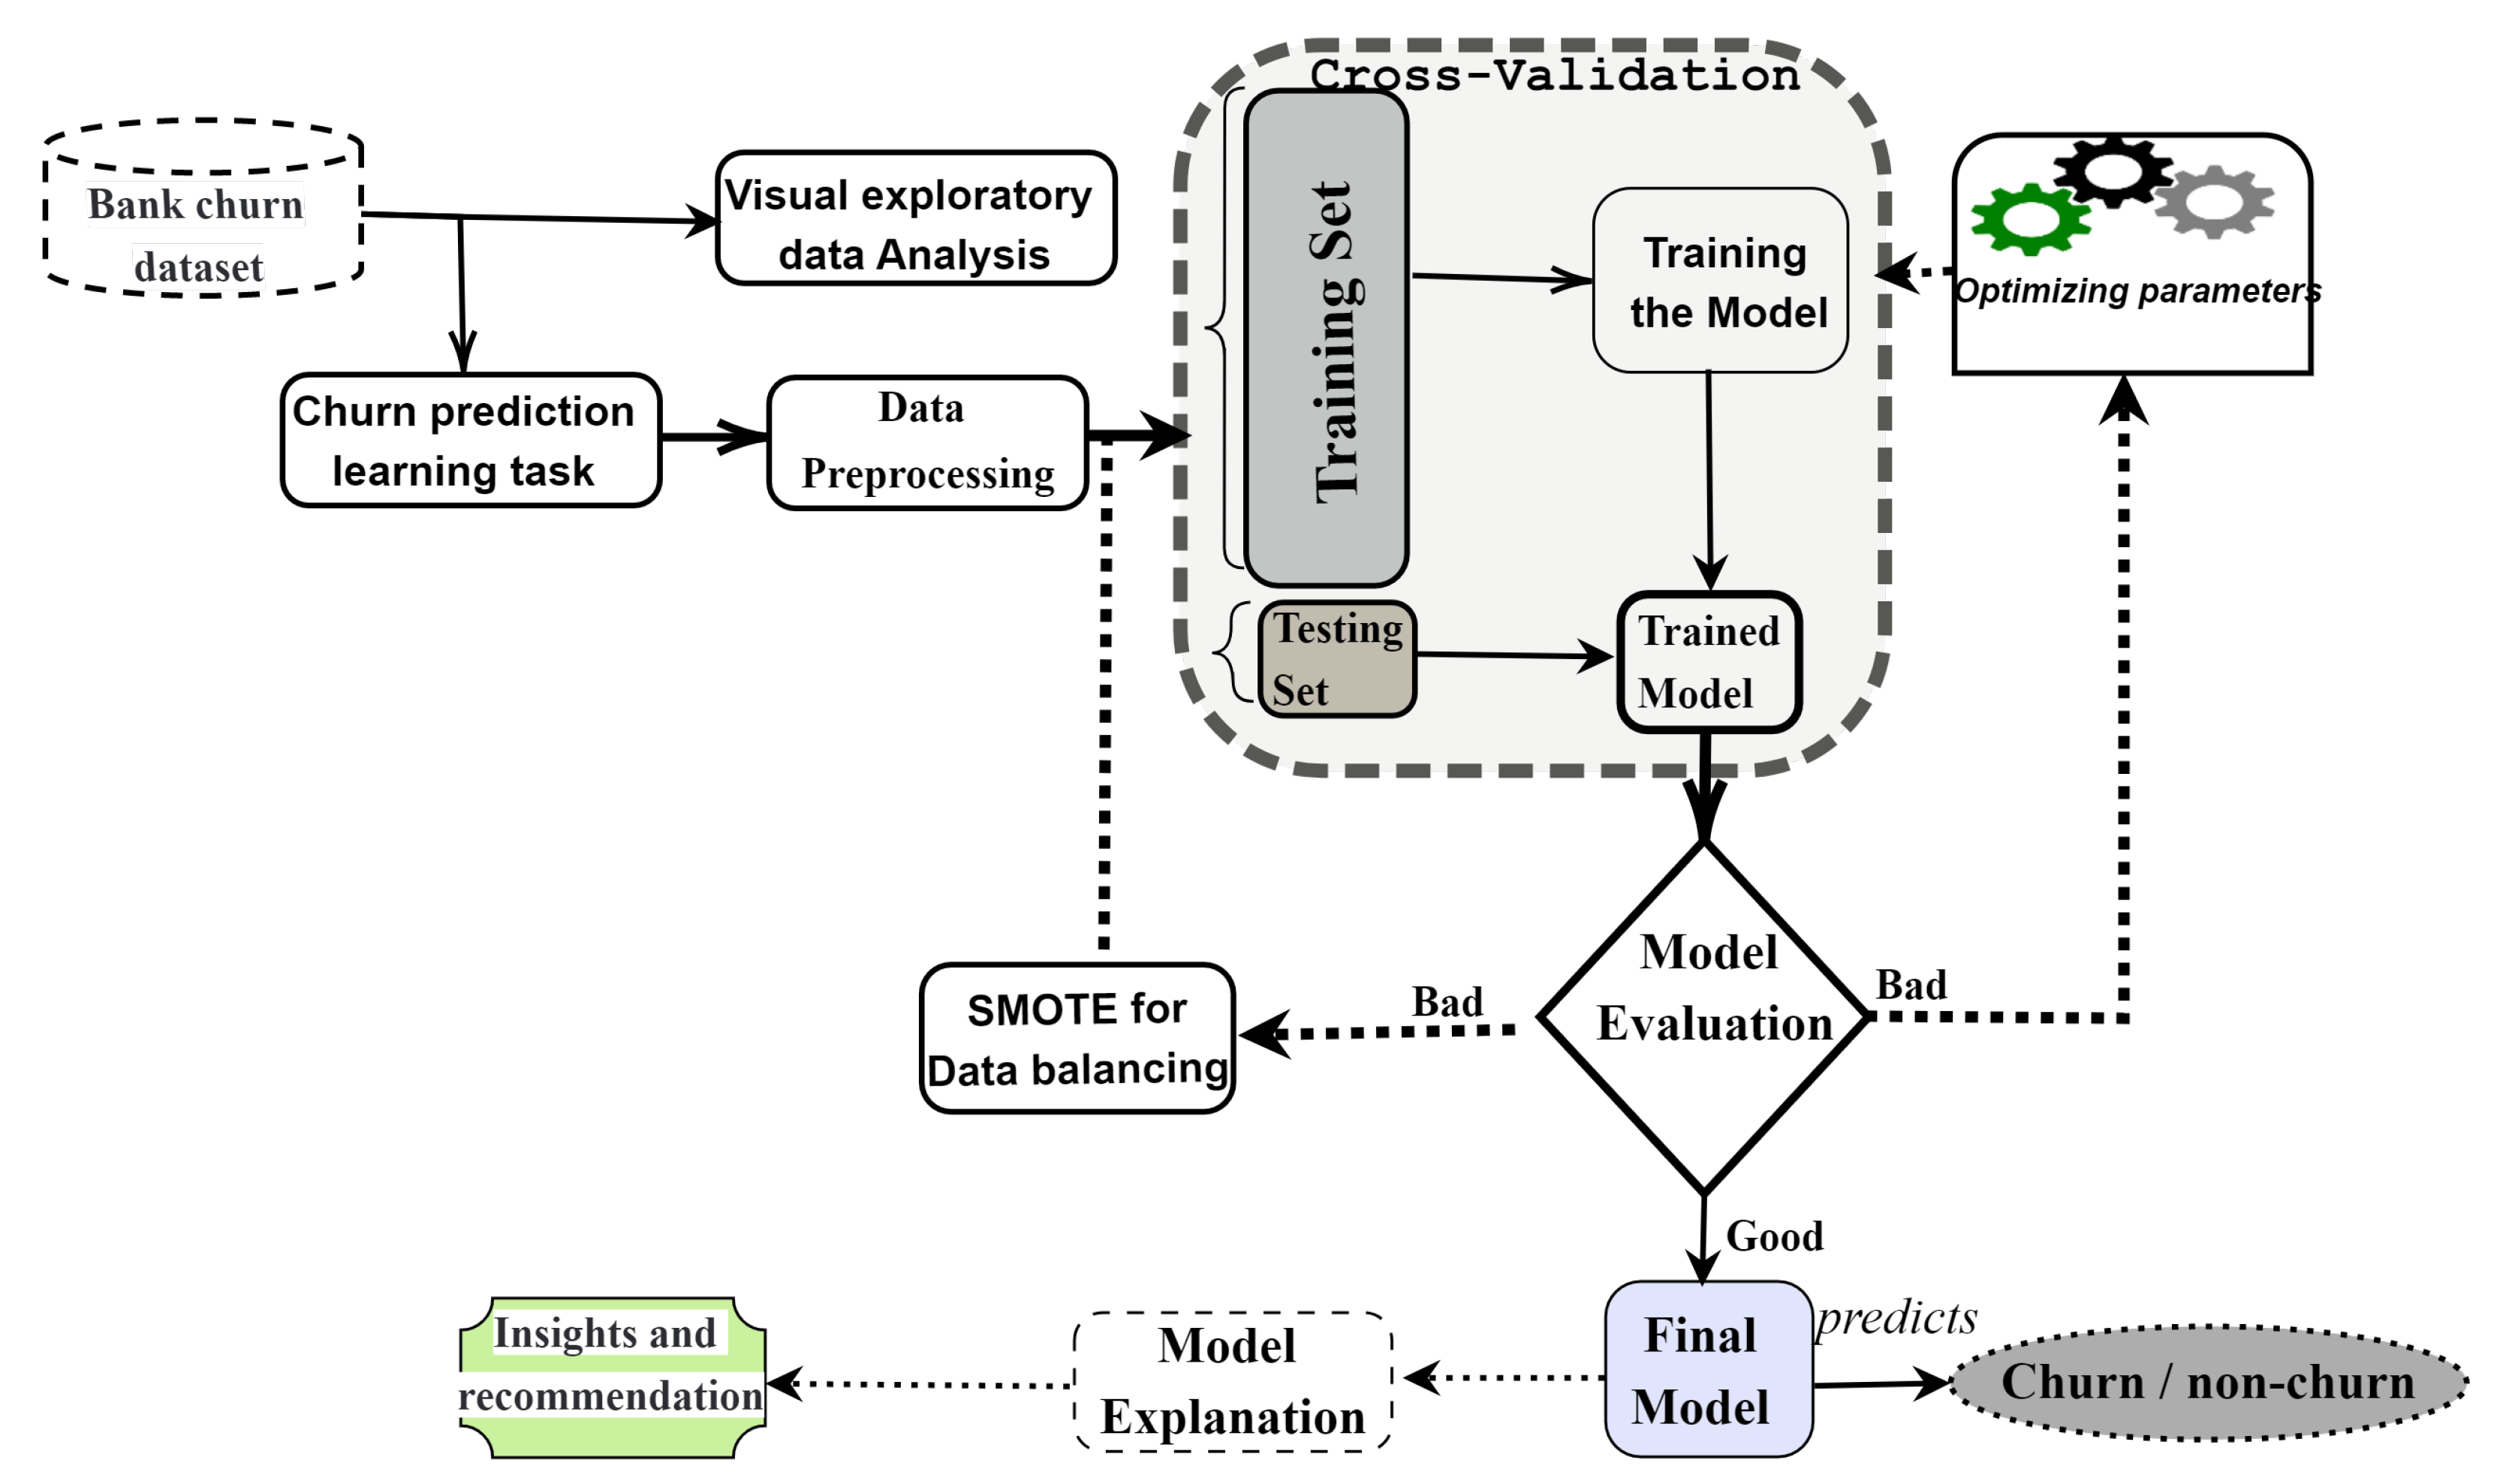

__Algorithms for Churn Prediction Models__

__XGBoost__, short for Extreme Gradient Boosting, is a scalable machine learning library with Distributed Gradient Boosted Decision Trees (GBDT). It provides Parallel Tree Boosting and is the leading machine learning library for regression, classification and ranking problems. To understand XGBoost, it’s important first to understand the machine learning concepts and algorithms that XGBoost is built on: supervised machine learning, decision trees, ensemble learning, and gradient boosting.

__Decision trees are a nonparametric supervised learning method used for classification and regression.__ The goal is to build a model that predicts the value of a target variable by learning simple decision rules derived from the properties of the data. A tree can be viewed as a piecewise constant approximation. For example, in the following example, a decision tree learns from data to approximate a sine wave using a series of if-then-else decision rules. The deeper the tree, the more complex the decision rules and the better the modelRandom Forest

__Random forest is a machine learning technique to solve regression and classification problems. It uses ensemble learning, a technique that combines many classifiers to provide solutions to complex problems.__

__A random forest algorithm consists of many decision trees. The “forest” created by the random forest algorithm is trained by bagging or bootstrap aggregation.__ Bagging is an ensemble meta-algorithm that improves the accuracy of machine learning algorithms. A (random forest) algorithm determines an outcome based on the predictions of a decision tree. Predict by averaging outputs from different trees. Increasing the number of trees improves the accuracy of the results.Support Vector Machines

__Support vector machines (SVMs) are supervised machine learning algorithms that can be used for both classification and regression tasks. However, it is mainly used in classification problems.__ The SVM algorithm plots each data item as a point in n-dimensional space (where n is the number of features it possesses). where the value of each feature is the value of a specific coordinate. Classification is then done by finding the hyperplane that distinguishes the two classes very well.

## 2. Problem Statement

__This dataset consists of data of the bank customer in 165034 rows and 14 columns__ which include details their demographic details,theiracoount deatils like bankbalane, estimated salary, is active member of the bank or not.


Your role as Data Scientist is to find:
 
1. using customer data from a bank to build a predictive model for the likely churn clients.
2. As we know, it is much more expensive to sign in a new client than to keep an existing one. It is advantageous for banks to know what leads clients to leave the company.
3. Churn prevention allows __companies to develop loyalty programs and retention campaigns to keep as many customers as possible.__

## 3. Installing & Importing Libraries


In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings as wrn
wrn.filterwarnings('ignore', category = DeprecationWarning) 
wrn.filterwarnings('ignore', category = FutureWarning) 
wrn.filterwarnings('ignore', category = UserWarning) 

## 4. Data Acquisition 

In [2]:
train= pd.read_csv(r"C:\Users\ADMIN\Desktop\train.csv")
test=pd.read_csv(r"C:\Users\ADMIN\Desktop\test.csv")

In [3]:
train = pd.read_csv(r"C:\Users\ADMIN\Desktop\train.csv") 
print('Data Shape:', train.shape)
train.reset_index(inplace = True)
train.head()

Data Shape: (165034, 14)


,index,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [4]:
test = pd.read_csv(r"C:\Users\ADMIN\Desktop\test.csv") 
print('Data Shape:', test.shape)
test.reset_index(inplace = True)
test.head()

Data Shape: (110023, 13)


,index,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,0,165034,15773898,Lucchese,586,France,Female,23.0,2,0.00,2,0.0,1.0,160976.75
1,1,165035,15782418,Nott,683,France,Female,46.0,2,0.00,1,1.0,0.0,72549.27
2,2,165036,15807120,K?,656,France,Female,34.0,7,0.00,2,1.0,0.0,138882.09
3,3,165037,15808905,O'Donnell,681,France,Male,36.0,8,0.00,1,1.0,0.0,113931.57
4,4,165038,15607314,Higgins,752,Germany,Male,38.0,10,121263.62,1,1.0,0.0,139431.00


## 5. Pre Profiling

### 5.1 Data Information
   In this section we will get information about the data and see some observations.

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 15 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   index            165034 non-null  int64  
 1   id               165034 non-null  int64  
 2   CustomerId       165034 non-null  int64  
 3   Surname          165034 non-null  object 
 4   CreditScore      165034 non-null  int64  
 5   Geography        165034 non-null  object 
 6   Gender           165034 non-null  object 
 7   Age              165034 non-null  float64
 8   Tenure           165034 non-null  int64  
 9   Balance          165034 non-null  float64
 10  NumOfProducts    165034 non-null  int64  
 11  HasCrCard        165034 non-null  float64
 12  IsActiveMember   165034 non-null  float64
 13  EstimatedSalary  165034 non-null  float64
 14  Exited           165034 non-null  int64  
dtypes: float64(5), int64(7), object(3)
memory usage: 18.9+ MB


In [45]:
'''Observations:
1. Index to be dropped here.
2. Rest everything seems normal in train dataset.
'''

'Observations:\n1. Index to be dropped here.\n2. Rest everything seems normal in train dataset.\n'

In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110023 entries, 0 to 110022
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   index            110023 non-null  int64  
 1   id               110023 non-null  int64  
 2   CustomerId       110023 non-null  int64  
 3   Surname          110023 non-null  object 
 4   CreditScore      110023 non-null  int64  
 5   Geography        110023 non-null  object 
 6   Gender           110023 non-null  object 
 7   Age              110023 non-null  float64
 8   Tenure           110023 non-null  int64  
 9   Balance          110023 non-null  float64
 10  NumOfProducts    110023 non-null  int64  
 11  HasCrCard        110023 non-null  float64
 12  IsActiveMember   110023 non-null  float64
 13  EstimatedSalary  110023 non-null  float64
dtypes: float64(5), int64(6), object(3)
memory usage: 11.8+ MB


In [8]:
'''Observations:
 Everything seems normal in test dataset.
'''

'Observations:\n Everything seems normal in test dataset.\n'

In [9]:
test

,index,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,0,165034,15773898,Lucchese,586,France,Female,23.0,2,0.00,2,0.0,1.0,160976.75
1,1,165035,15782418,Nott,683,France,Female,46.0,2,0.00,1,1.0,0.0,72549.27
2,2,165036,15807120,K?,656,France,Female,34.0,7,0.00,2,1.0,0.0,138882.09
3,3,165037,15808905,O'Donnell,681,France,Male,36.0,8,0.00,1,1.0,0.0,113931.57
4,4,165038,15607314,Higgins,752,Germany,Male,38.0,10,121263.62,1,1.0,0.0,139431.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110018,110018,275052,15662091,P'eng,570,Spain,Male,29.0,7,116099.82,1,1.0,1.0,148087.62
110019,110019,275053,15774133,Cox,575,France,Female,36.0,4,178032.53,1,1.0,1.0,42181.68
110020,110020,275054,15728456,Ch'iu,712,France,Male,31.0,2,0.00,2,1.0,0.0,16287.38
110021,110021,275055,15687541,Yegorova,709,France,Female,32.0,3,0.00,1,1.0,1.0,158816.58


### 5.2 Data Description
 In this section we will get information about the data and see some observations

In [10]:
train.describe()

,index,id,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,165034.0000,165034.0000,1.650340e+05,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000
mean,82516.5000,82516.5000,1.569201e+07,656.454373,38.125888,5.020353,55478.086689,1.554455,0.753954,0.497770,112574.822734,0.211599
std,47641.3565,47641.3565,7.139782e+04,80.103340,8.867205,2.806159,62817.663278,0.547154,0.430707,0.499997,50292.865585,0.408443
min,0.0000,0.0000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,41258.2500,41258.2500,1.563314e+07,597.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,74637.570000,0.000000
50%,82516.5000,82516.5000,1.569017e+07,659.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,117948.000000,0.000000
75%,123774.7500,123774.7500,1.575682e+07,710.000000,42.000000,7.000000,119939.517500,2.000000,1.000000,1.000000,155152.467500,0.000000
max,165033.0000,165033.0000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


In [11]:
'''Observations:
Everything looks normal in the dataset 
'''

'Observatiobs:\nEverything looks normal in the dataset \n'

### 5.3 Data nunique()
  In this section we will get information about the data and see some observations

In [12]:
train.nunique()

index              165034
id                 165034
CustomerId          23221
Surname              2797
CreditScore           457
Geography               3
Gender                  2
Age                    71
Tenure                 11
Balance             30075
NumOfProducts           4
HasCrCard               2
IsActiveMember          2
EstimatedSalary     55298
Exited                  2
dtype: int64

## 6. Pre Processing & Post Profiling

### 6.1  Drop Index


In [13]:
train.drop(['index'], axis = 1, inplace = True)

In [14]:
test.drop(['index'], axis = 1, inplace = True)

In [15]:
test

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,165034,15773898,Lucchese,586,France,Female,23.0,2,0.00,2,0.0,1.0,160976.75
1,165035,15782418,Nott,683,France,Female,46.0,2,0.00,1,1.0,0.0,72549.27
2,165036,15807120,K?,656,France,Female,34.0,7,0.00,2,1.0,0.0,138882.09
3,165037,15808905,O'Donnell,681,France,Male,36.0,8,0.00,1,1.0,0.0,113931.57
4,165038,15607314,Higgins,752,Germany,Male,38.0,10,121263.62,1,1.0,0.0,139431.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
110018,275052,15662091,P'eng,570,Spain,Male,29.0,7,116099.82,1,1.0,1.0,148087.62
110019,275053,15774133,Cox,575,France,Female,36.0,4,178032.53,1,1.0,1.0,42181.68
110020,275054,15728456,Ch'iu,712,France,Male,31.0,2,0.00,2,1.0,0.0,16287.38
110021,275055,15687541,Yegorova,709,France,Female,32.0,3,0.00,1,1.0,1.0,158816.58


### 6.2 Missing Values

In [16]:
train.isnull().sum()

id                 0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [17]:
'''Observations:
No Null values found in train dataset.
'''

'Observations:\nNo Null values found in train dataset.\n'

In [18]:
test.isnull().sum()

id                 0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
dtype: int64

In [19]:
'''Observations:
No Null values found in test dataset.
'''

'Observations:\nNo Null values found in test dataset.\n'

### 6.3 Datatypes

In [20]:
train.dtypes

id                   int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                float64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard          float64
IsActiveMember     float64
EstimatedSalary    float64
Exited               int64
dtype: object

In [21]:
test.dtypes

id                   int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                float64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard          float64
IsActiveMember     float64
EstimatedSalary    float64
dtype: object

In [22]:
'''Observations:
No error found in datatypes in both train and test dataset.
'''

'Observations:\nNo error found in datatypes in both train and test dataset.\n'

<Axes: xlabel='Age'>

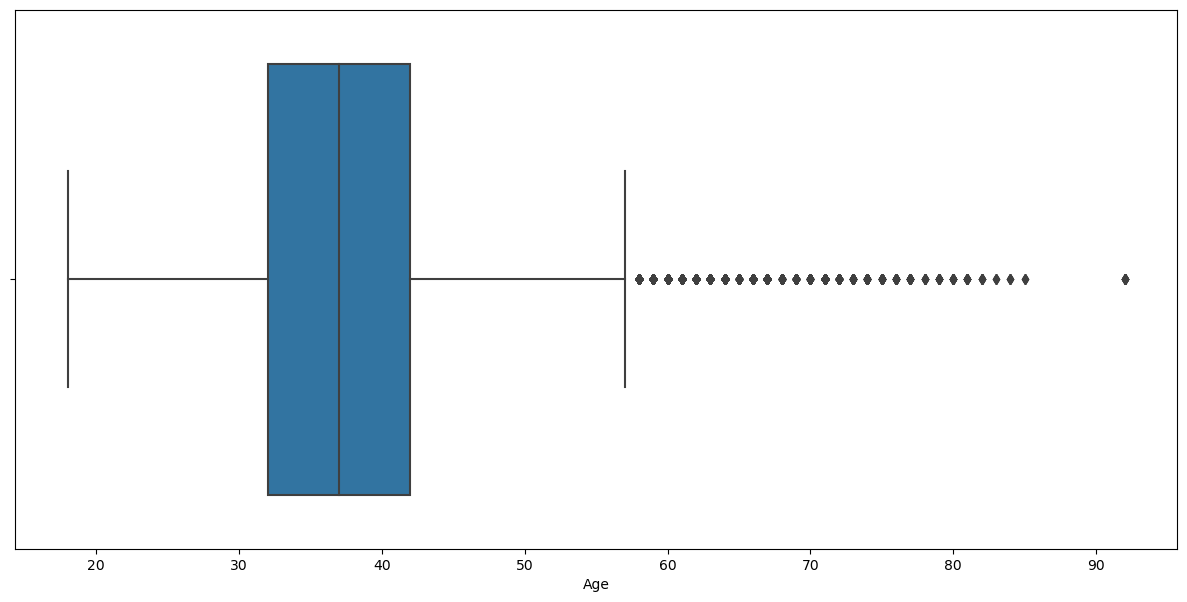

In [23]:
paper = plt.figure(figsize = [15,7])
sns.boxplot(x = train['Age'])

In [51]:
'''Observations:
outliers are there in age but we dont recommend the removal of outliers for better working of the model with outliers in both train and test dataset.
'''

'Observations:\noutliers are there in age but we dont recommend the removal of outliers for better working of the model with outliers in both train and test dataset.\n'

### 6.4 Check Duplicates

In [24]:
train.duplicated().sum()

0

In [25]:
test.duplicated().sum()

0

In [26]:
'''Observations:
No duplicates found in both train and test dataset.
'''

'Observations:\nNo duplicates found in both train and test dataset.\n'

## 7. EDA  - Business Understanding

### 7.1 Univariate Analysis

In [27]:
numerical_variables = ['CreditScore','Age', 'Balance','EstimatedSalary' ]
target_variable = 'Exited'
categorical_variables = ['Geography', 'Gender', 'Tenure','NumOfProducts', 'HasCrCard','IsActiveMember']

### Get numerical and categorical features

In [28]:
num_cols = list(train.select_dtypes(exclude=['object']).columns)
cat_cols = list(train.select_dtypes(include=['object']).columns)

not_num = ['HasCrCard', 'IsActiveMember']

num_cols = [col for col in num_cols if col not in not_num + ['CustomerId', 'id', 'Exited']]
cat_cols = cat_cols + not_num

print('Numerical Features:')
print(num_cols)
print('-'*20)
print('Categoric Features:')
print(cat_cols)


Numerical Features:
['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
--------------------
Categoric Features:
['Surname', 'Geography', 'Gender', 'HasCrCard', 'IsActiveMember']


In [29]:
train

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165029,165029,15667085,Meng,667,Spain,Female,33.0,2,0.00,1,1.0,1.0,131834.75,0
165030,165030,15665521,Okechukwu,792,France,Male,35.0,3,0.00,1,0.0,0.0,131834.45,0
165031,165031,15664752,Hsia,565,France,Male,31.0,5,0.00,1,1.0,1.0,127429.56,0
165032,165032,15689614,Hsiung,554,Spain,Female,30.0,7,161533.00,1,0.0,1.0,71173.03,0


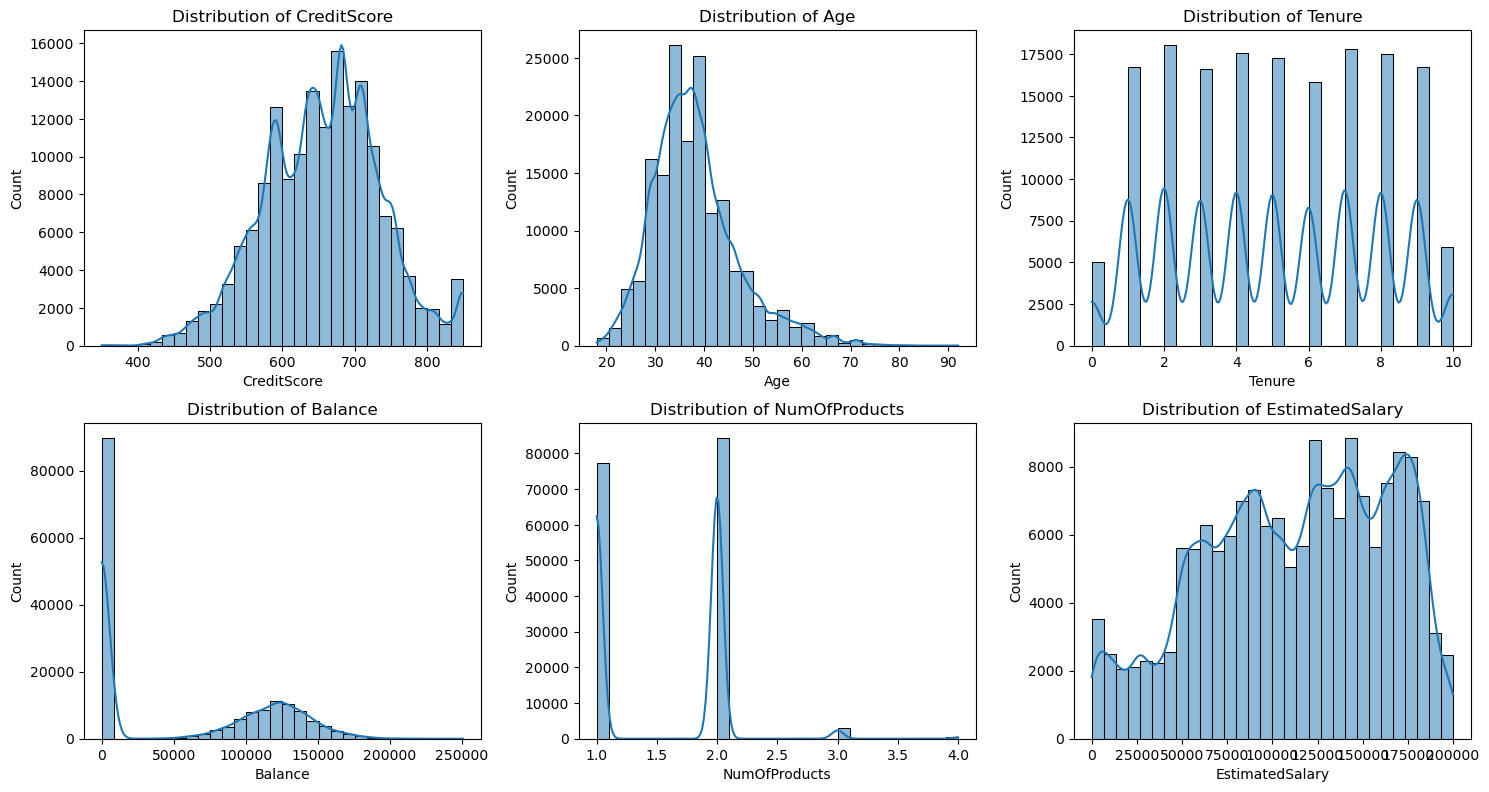

In [30]:
fig = plt.figure(figsize=(15, 8))

for idx, col in enumerate(num_cols):
    plt.subplot(2, 3, idx+1)
    sns.histplot(train[col], bins=30, kde=True)
    plt.title(f'Distribution of {col}')
    
fig.tight_layout(pad=1.0)

**Observations**:
    
1. __CreditScore__: The distribution appears to be fairly normal, centered around a mid-range credit score, indicating a typicall bell-shaped curve.

2. __Age__: The distribution is right-skewed, meaning there are more younger customers than older ones, with a peak in the 30s to 40s age range.
We can consider to apply transformation to this feature to reduce skewness, such as using a logarithmic or square root transformation.

3. __Binning ages__ into categorical groups (e.g., young adults, middle-aged, seniors) could also be useful for certain types of analysis.

4. __Tenure__: The distribution of tenure is relatively uniform across different values, but with slight decreases at the lowest and highest values.

5. __Balance__: A significant amount of customers have a balance of zero, and for those with non-zero balance, the distribution is fairly normal.
Consider creating a binary feature indicating whether the balance is zero or not. This could be useful in modeling, as the zero-balance group might have different characteristics.

6. __NumOfProducts__: Most customers have 1 or 2 products with the bank. There are relatively few customers with 3 or 4 products.

7. __EstimatedSalary__: It appears that the banks has customers with wide variety of salary levels.
No transformation seems necessary. However, salary could be binned into categories (e.g., low, medium, high) if that proves useful for the analysis.


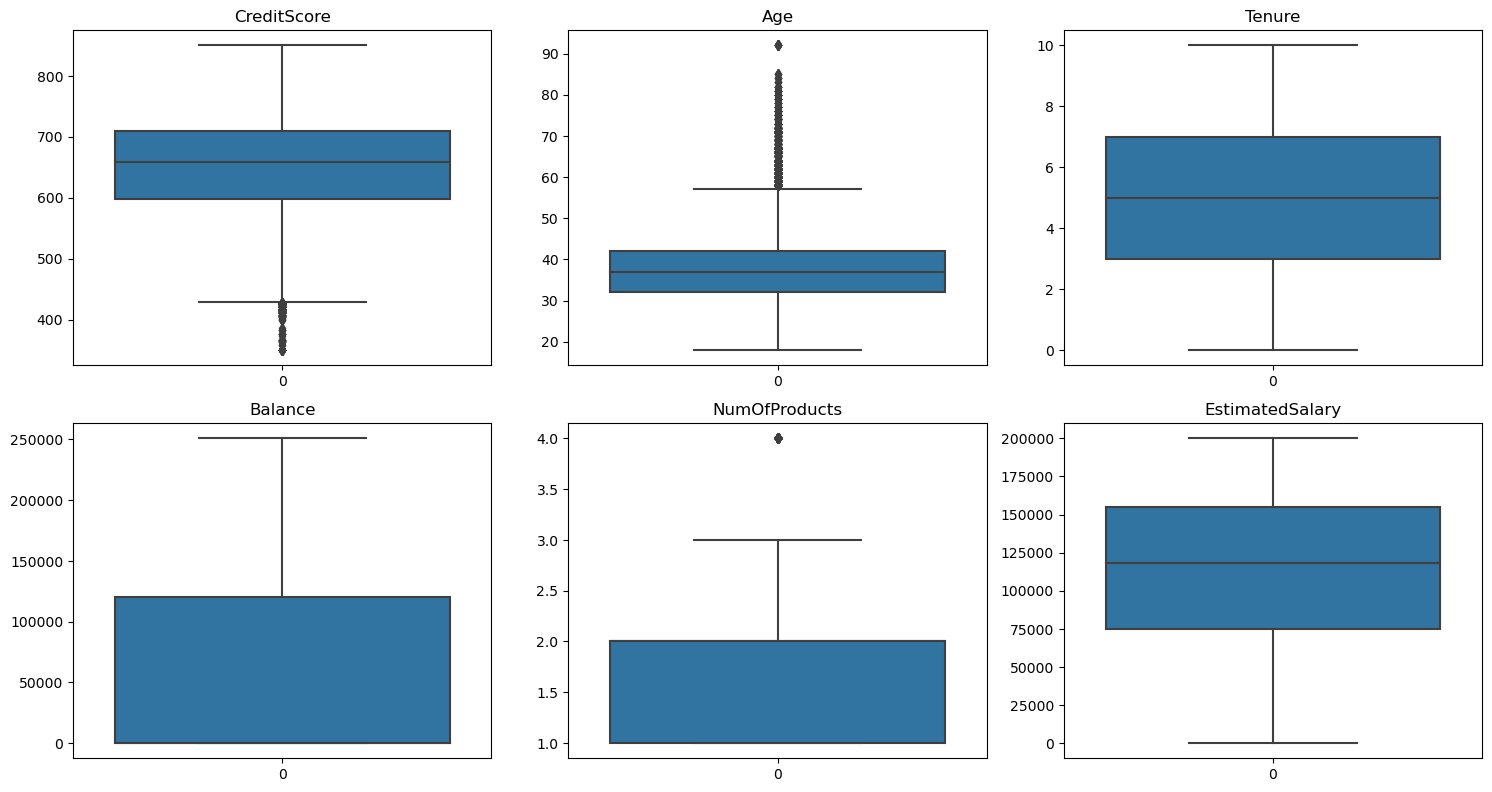

In [31]:
fig = plt.figure(figsize=(15, 8))

for idx, col in enumerate(num_cols):
    plt.subplot(2, 3, idx+1)
    sns.boxplot(train[col])
    plt.title(f'{col}')
fig.tight_layout(pad=1.0)

**Observation**:
1. __CreditScore__: There are outliers on the lower end of the credit score range. They represent customers with unusually low credit scores.
2. __Age__: Some outliers are present at the higher age values, indicating a few customers significantly older than the general customer base.
3. __NumOfProducts__: Some outliers are observed for customers owning than 2 products, although these are not extreme.

### Categorical Values

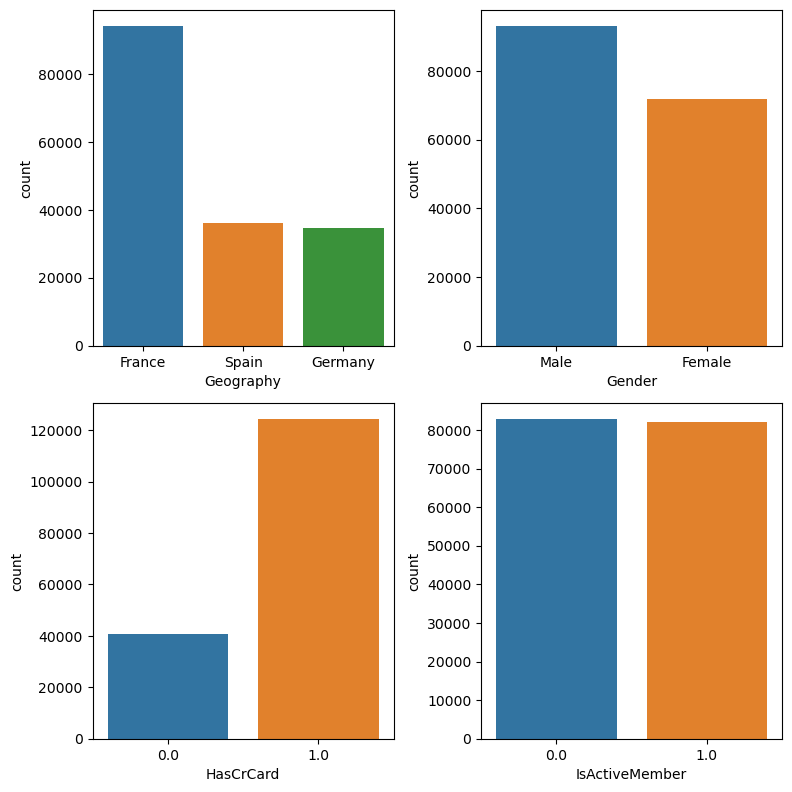

In [32]:
fig = plt.figure(figsize=(8, 8))

for idx, col in enumerate(cat_cols):
    if col != 'Surname':
        plt.subplot(2, 2, idx)
        sns.countplot(data=train, x=col)
    
fig.tight_layout(pad=1.0)

**Observation**:

1.__Geography__: One region (presumably France, based on the earlier dataset preview) has a significantly higher number of customers compared to the others. This suggests that geographic location might be an important factor in understanding customer behavior or preferences.

2.__Gender__: There is a noticeable difference in the distribution between male and female customers, with one gender slightly more prevalent. Gender could be a relevant variable in predicting certain outcomes, such as product preferences or banking behavior.

3.__HasCrCard__: A majority of customers have a credit card. However, there's still a substantial proportion that does not. This feature can be valuable in understanding the financial behavior of customers, such as their propensity to use bank products or services.

4.__IsActiveMember__: There's a nearly even split between active and inactive members, with a slight lean towards one category.


### Target Value

<Axes: xlabel='Exited', ylabel='count'>

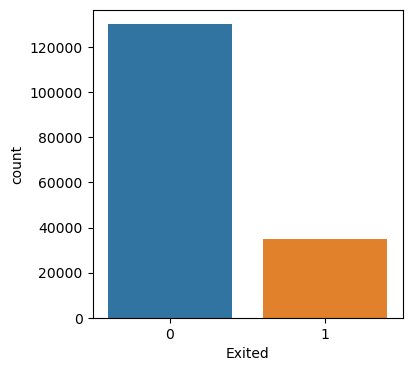

In [33]:
fig = plt.figure(figsize=(4, 4))
sns.countplot(data=train, x='Exited')

**Observation**:
    
There is a clear imbalance in the dataset with respect to the target variable. A significantly larger number of customers have not exited (indicated by '0') compared to those who have (indicated by '1'). The low proportion of customers who have exited could be indicative of good customer retention strategies or general satisfaction with the services. However, it's also crucial for predictive models to accurately identify the smaller group of customers who are at risk of exiting, as they represent a key area for intervention and improvement in services.

This imbalance needs to be carefully considered in model training. Models trained on imbalanced datasets may be biased towards predicting the majority class. It's recommended to use appropriate evaluation metircs that are sensitive to class imbalance (like F1-Score, precision-recall, AUC, etc.).

### 7.2 Bivariate Analysis

#### Correlation Matrix

<Axes: title={'center': 'Correlation Matrix'}>

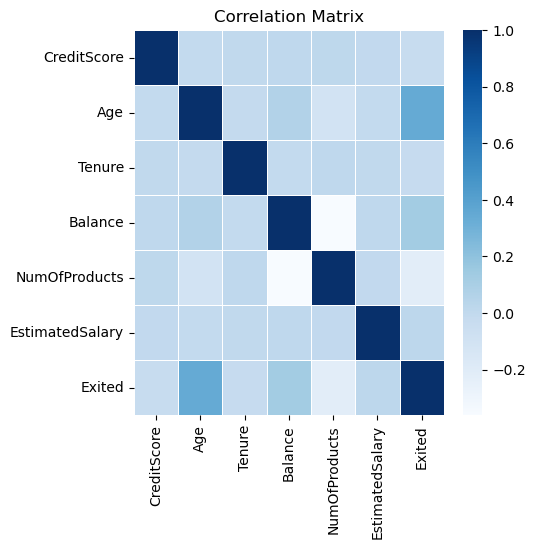

In [34]:
# Correlation Matrix

plt.figure(figsize=(5, 5))
plt.title('Correlation Matrix')
correlation = train.loc[:, num_cols + ['Exited']].corr()
sns.heatmap(correlation, linewidth=0.7, cmap='Blues')

**Observation**:
    
__When we examine the correlation heatmap above, we can say that there are no highly correlated variables among our numerical variables__.

#### Categorical vs. Numerical

In [35]:
print(num_cols)
print(cat_cols)

['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
['Surname', 'Geography', 'Gender', 'HasCrCard', 'IsActiveMember']


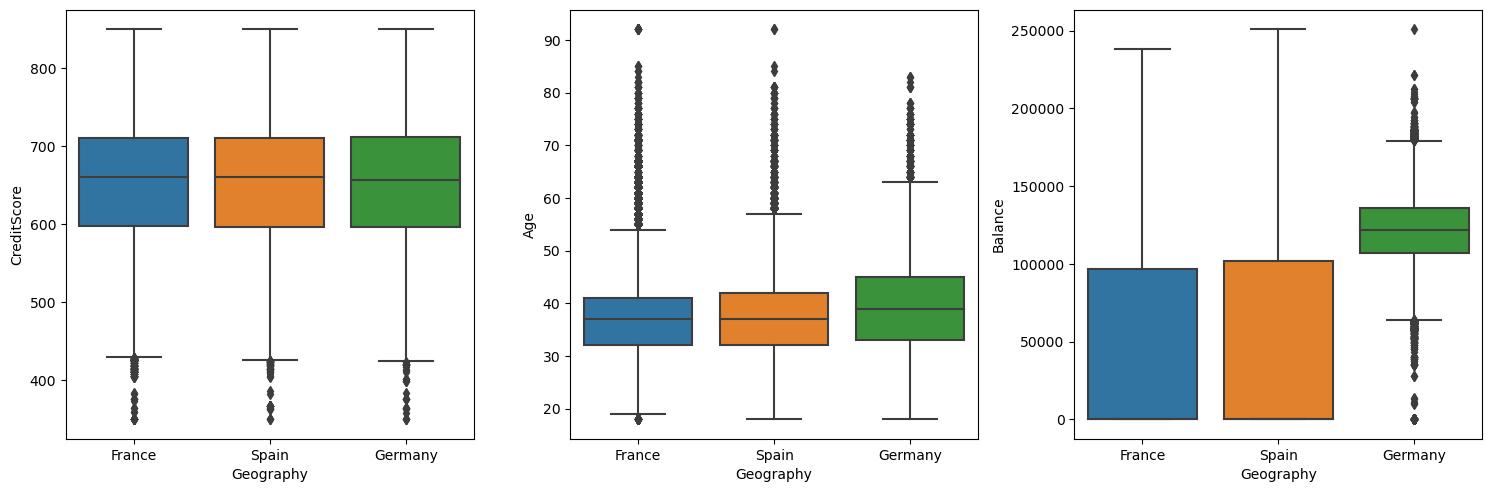

In [36]:
fig = plt.figure(figsize=(15,5))

for idx, val in enumerate(['CreditScore', 'Age', 'Balance']):
    plt.subplot(1, 3, idx+1)
    sns.boxplot(x='Geography', y=val, data=train)
    
fig.tight_layout(pad=1.0)

**Observation**:
    
1. The credit scores across different geographic regions appear relatively similar in terms of median and interquartile range.

2. There are slight variations in age distributions across different regions. One region appears to have a slightly higher median age than the others.

3. Significant differences in account balances across regions are evident. One region, in particular, seems to have higher median balances and a wider range of balances compared to the others.

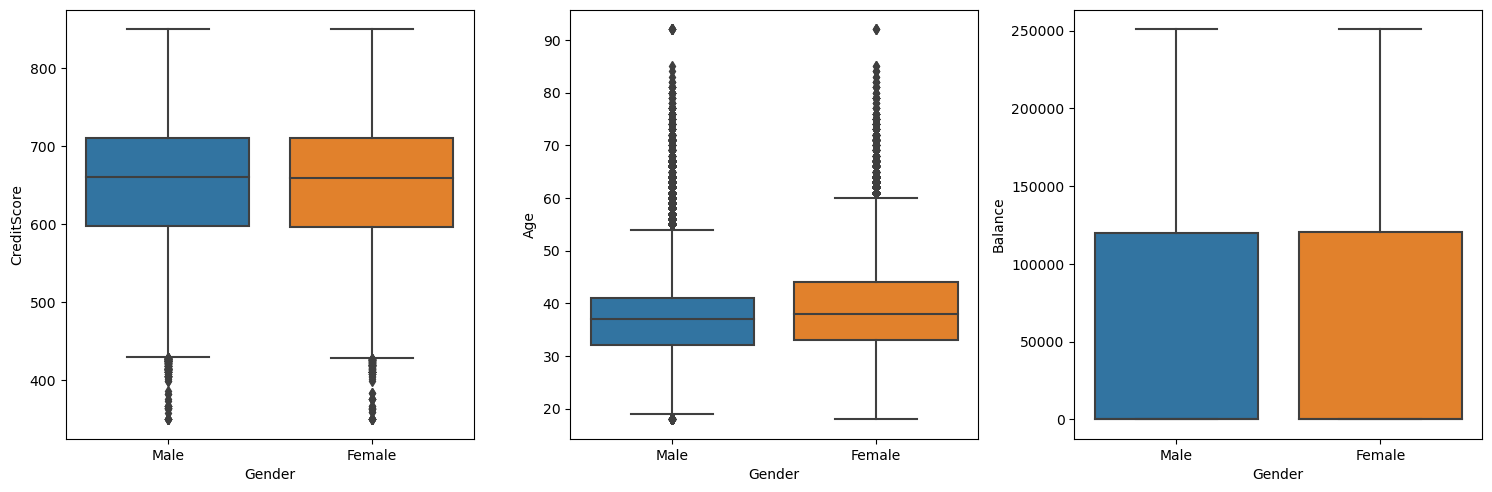

In [37]:
fig = plt.figure(figsize=(15,5))

for idx, val in enumerate(['CreditScore', 'Age', 'Balance']):
    plt.subplot(1, 3, idx+1)
    sns.boxplot(x='Gender', y=val, data=train)

fig.tight_layout(pad=1.0)

<Axes: xlabel='HasCrCard', ylabel='Balance'>

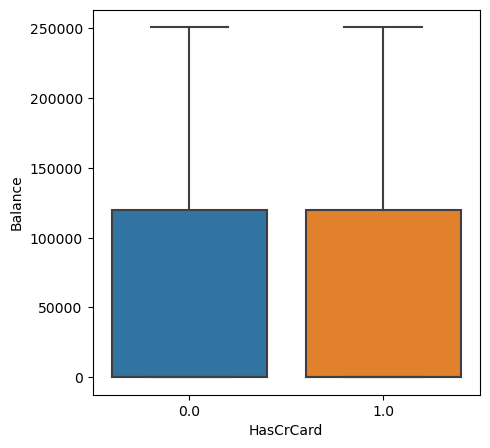

In [38]:
plt.figure(figsize=(5,5))
sns.boxplot(x='HasCrCard', y='Balance', data=train)

#### Categorical vs. Categorical¶

In [39]:
cat_cols

['Surname', 'Geography', 'Gender', 'HasCrCard', 'IsActiveMember']

In [40]:
train[['Geography', 'Exited']].groupby(['Geography'], as_index=False).mean()

,Geography,Exited
0,France,0.165282
1,Germany,0.378952
2,Spain,0.172176


**Observation**:

  __It seems that customers from Germany are more inclined to leave compared to customers from other regions__.

In [41]:
train[['Gender', 'Exited']].groupby(['Gender'], as_index=False).mean()

,Gender,Exited
0,Female,0.279687
1,Male,0.159055


**Observation**:

__Females customers are more likely to leave compared to male customers__.

In [42]:
train[['HasCrCard', 'Exited']].groupby(['HasCrCard'], as_index=False).mean()

,HasCrCard,Exited
0,0.0,0.227429
1,1.0,0.206433


**Observation**:
 
__It appears that customers who both have and don't have a credit card show a similar likelihood to leave__.  
    

In [43]:
train[['IsActiveMember', 'Exited']].groupby(['IsActiveMember'], as_index=False).mean()

,IsActiveMember,Exited
0,0.0,0.297086
1,1.0,0.125345


**Observation**:

__Inactive passengers have a slightly higher likelihood of being exited (30%) compared to active customers (12%)__.

## 8.Conclusion

From the Above Dataset we have drawn some Actionable Insights from it.

1. __CreditScore__: The distribution appears to be fairly normal, centered around a mid-range credit score, indicating a typicall bell-shaped curve.

2. __Age__: The distribution is right-skewed, meaning there are more younger customers than older ones, with a peak in the 30s to 40s age range.
   We can consider to apply transformation to this feature to reduce skewness, such as using a logarithmic or square root    transformation.

3. __Binning ages__ into categorical groups (e.g., young adults, middle-aged, seniors) could also be useful for certain types of analysis.

4. __Tenure__: The distribution of tenure is relatively uniform across different values, but with slight decreases at the lowest and highest values.

5. __Balance__: A significant amount of customers have a balance of zero, and for those with non-zero balance, the distribution is fairly normal.

6. __NumOfProducts__: Most customers have 1 or 2 products with the bank. There are relatively few customers with 3 or 4 products.

7. __EstimatedSalary__: It appears that the banks has customers with wide variety of salary levels.
No transformation seems necessary. However, salary could be binned into categories (e.g., low, medium, high) if that proves useful for the analysis.

8. __CreditScore__: There are outliers on the lower end of the credit score range. They represent customers with unusually low credit scores.

9. __Age__: Some outliers are present at the higher age values, indicating a few customers significantly older than the general customer base.

10. __NumOfProducts__: Some outliers are observed for customers owning than 2 products, although these are not extreme.

11. __Geography__: One region (presumably France, based on the earlier dataset preview) has a significantly higher number of customers compared to the others. This suggests that geographic location might be an important factor in understanding customer behavior or preferences.

12. __Gender__: There is a noticeable difference in the distribution between male and female customers, with one gender slightly more prevalent. Gender could be a relevant variable in predicting certain outcomes, such as product preferences or banking behavior.

13. __HasCrCard__: A majority of customers have a credit card. However, there's still a substantial proportion that does not. This feature can be valuable in understanding the financial behavior of customers, such as their propensity to use bank products or services.

14. __IsActiveMember__: There's a nearly even split between active and inactive members, with a slight lean towards one category.

15. **From the Above EDA we came to Know that most of the Members are not churned or excited**.